<a href="https://colab.research.google.com/github/Josephmdlv/Final-work/blob/main/DiD_Human_Rights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import os
from google.colab import files
import requests

def download_and_process_data(url):
  filename = os.path.basename(url)
  response = requests.get(url)

  with open(filename, 'wb') as file:
      file.write(response.content)

  df = pd.read_csv(filename)

  return df

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [19]:
url = "https://raw.githubusercontent.com/Josephmdlv/Final-work/refs/heads/main/Human_Rights_Index_2000_2020_Cleaned.csv"
df = pd.read_csv(url, sep=";")
df.head()

,Year,Tunisia,United Arab Emirates
0,2000,0.32,Tunisia
1,2001,0.32,Tunisia
2,2002,0.32,Tunisia
3,2003,0.32,Tunisia
4,2004,0.32,Tunisia


In [25]:
df = df.rename(columns={
    'Year': 'date_year',
    'Tunisia': 'human_rights_index',
    'United Arab Emirates': 'country_name'
})
df['date_year'] = pd.to_datetime(df['date_year'], format='%Y')
df.head()

,date_year,human_rights_index,country_name
0,2000-01-01,0.32,Tunisia
1,2001-01-01,0.32,Tunisia
2,2002-01-01,0.32,Tunisia
3,2003-01-01,0.32,Tunisia
4,2004-01-01,0.32,Tunisia


In [26]:
did=df

fig = px.line(
    df,
    x='date_year',
    y=['human_rights_index'],
    color='country_name',
    title="Human Rights Index in Tunisia and United Arab Emirates"
)

fig.show()

In [27]:
did['post']=np.where(did['date_year']>='2010-01-01',1,0) # create a variable that is 1 if the date is after the minimum wage increase and 0 otherwise
did['treatment']=np.where(did['country_name']=='Tunisia',1,0) # create a variable that is 1 if the state is new jersey (i.e., the treatment group) and 0 for pennsylvania (the control group)
did['post_treatment']=did['post']*did['treatment'] # create a variable that is 1 if the date is after the minimum wage increase and the state is new jersey and 0 otherwise

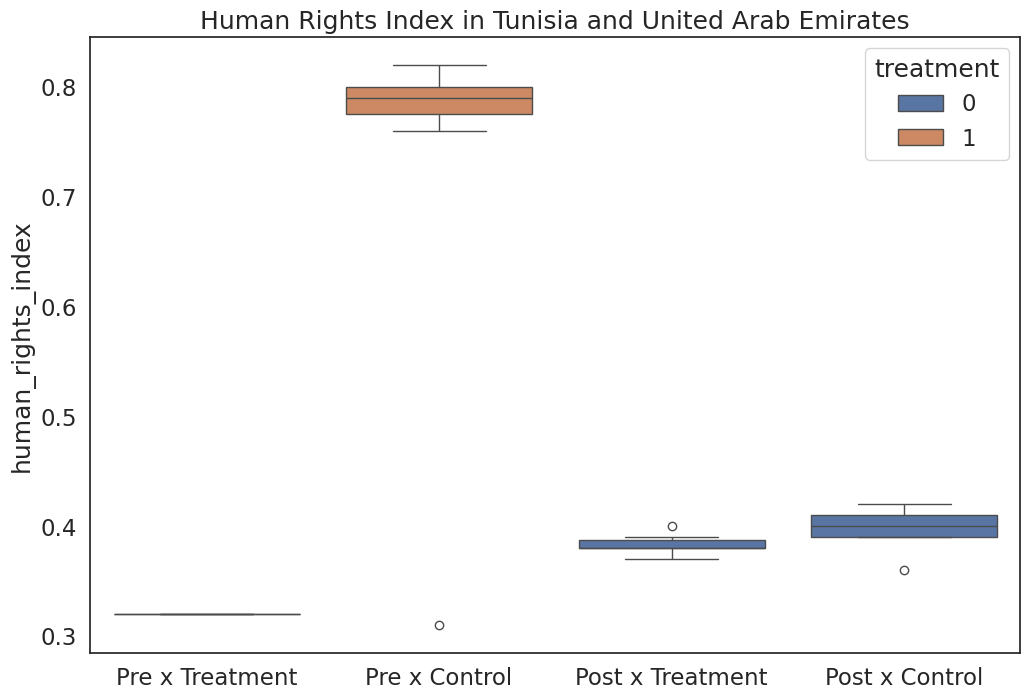

In [29]:
did['category']=did['treatment'].astype(str)+did['post'].astype(str) # this variable is just for the plot below
sns.boxplot(x='category', y='human_rights_index', hue='treatment', data=did).set_xticklabels(["Pre x Treatment", "Pre x Control",'Post x Treatment','Post x Control'])
plt.xlabel('')
plt.title('Human Rights Index in Tunisia and United Arab Emirates')
plt.show()

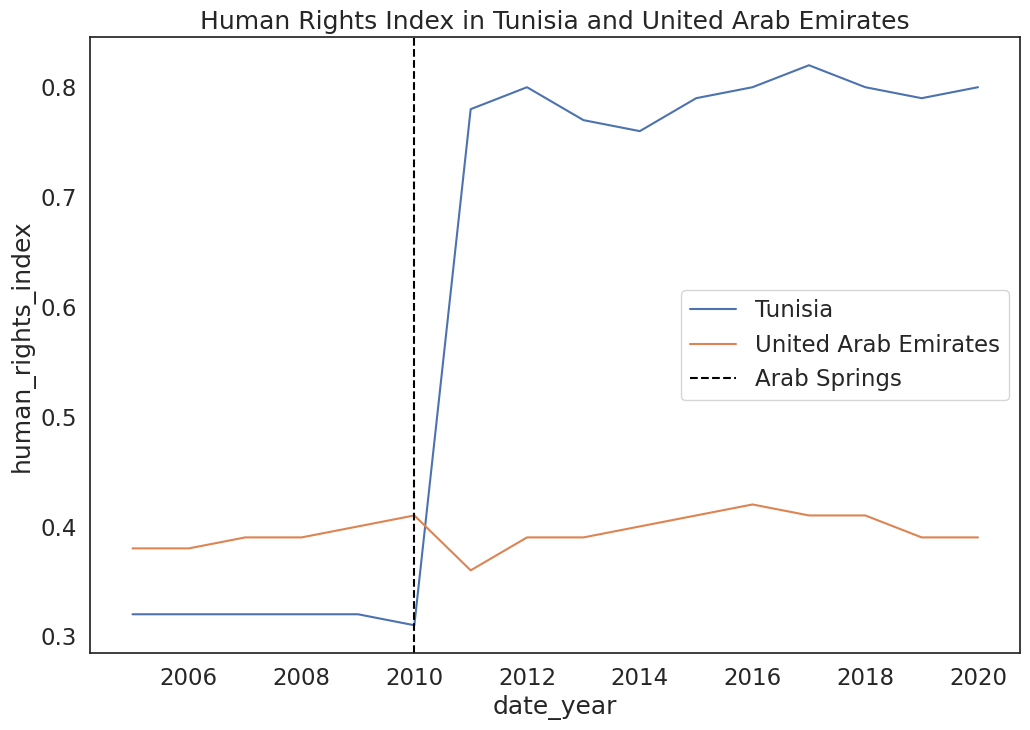

In [30]:
did=did[(did['date_year']>='2005-01-01') & (did['date_year']<='2020-01-01')]
sns.lineplot(data=did,x='date_year',y='human_rights_index',hue='country_name')
plt.axvline(pd.to_datetime('2010-01-01'),color='black',linestyle='dashed', label='Arab Springs')
plt.title('Human Rights Index in Tunisia and United Arab Emirates')
plt.legend()

In [32]:
did_model = ols('human_rights_index ~  post + treatment + post_treatment', did).fit()
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:     human_rights_index   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     43.66
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.09e-10
Time:                        10:50:27   Log-Likelihood:                 34.561
No. Observations:                  32   AIC:                            -61.12
Df Residuals:                      28   BIC:                            -55.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3880      0.039      9.

In [34]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

X = did[['post', 'treatment', 'post_treatment']]
y = did['human_rights_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

did_model = smf.ols('human_rights_index ~ post + treatment + post_treatment', data=pd.concat([X_train, y_train], axis=1)).fit()

print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:     human_rights_index   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     22.97
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.10e-06
Time:                        10:51:06   Log-Likelihood:                 22.737
No. Observations:                  24   AIC:                            -37.47
Df Residuals:                      20   BIC:                            -32.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3900      0.051      7.